In [1]:
import warnings
warnings.filterwarnings("ignore")

# 분산 분석과 모형 성능

## 분산 분석

선형회귀분석의 결과가 얼마나 좋은지는 단순히 잔차제곱합(RSS: Residula Sum of Square)으로 평가할 수 없다. 변수의 단위 즉, 스케일이 달라지면 회귀분석과 상관없이 잔차제곱합도 달라지기 때문이다. 또한 data가 많아지면 RSS가 커진다.

분산 분석(ANOVA: Analysis of Variance)은 **종속변수의 분산과 독립변수의 분산간의 관계를 사용하여 선형회귀분석의 성능을 평가하고자 하는 방법**이다. 분산 분석은 ① 서로 다른 두 개의 선형회귀분석의 성능 비교에 응용할 수 있으며 ② 독립변수가 카테고리 변수인 경우 각 카테고리 값에 따른 영향을 정량적으로 분석하는데도 사용된다.

$\bar{y}$를 종속 변수 $y$의 샘플 평균이라고 하자.

$$\bar{y}=\frac{1}{N}\sum_{i=1}^N y_i $$

종속 변수 $y$의 분산(샘플의 갯수로 나누지 않았으므로 정확하게는 분산이 아니지만 여기에서는 분산이라는 용어를 사용하자)을 나타내는 **TSS(total sum of square)**라는 값을 정의한다.

$$\text{TSS} = \sum_{i=1}^N (y_i-\bar{y})^2 = (y - \bar{y})^T(y - \bar{y} )$$

**TSS는 종속변수값의 움직임의 범위**를 나타낸다.

마찬가지로 회귀 분석에 의해 예측한 값 $\hat{y}$의 분산을 나타내는 **ESS(explained sum of squares)**,

$$\text{ESS}=\sum_{i=1}^N (\hat{y}_i -\bar{\hat{y}})^2 = (\hat{y} - \bar{\hat{y}})^T(\hat{y} - \bar{\hat{y}})$$

잔차 $e$의 분산을 나타내는 **RSS(residual sum of squares)**도 정의할 수 있다.

$$\text{RSS}=\sum_{i=1}^N (y_i - \hat{y}_i)^2\ = e^Te$$

위 식에서 $\bar{\hat{y}}$는 모형 예측값 $\hat{y}$의 평균이다.

또한 **ESS는 모형에서 나온 예측값의 움직임의 범위**, **RSS는 잔차의 움직임의 범위, 즉 오차의 크기**를 뜻한다고 볼 수 있다.

만약 회귀모형이 상수항을 포함하여 올바르게 정의되었다면 잔차의 평균이 0이 된다. 즉, 종속변수의 평균과 모형 예측값의 평균이 같아진다.

$$ \bar{e} = \bar{y} - \bar{\hat{y}} = 0$$

$$ \bar{y} = \bar{\hat{y}} $$

그리고 이 분산값들 간에는 다음과 같은 관계가 성립한다. 아래 식은 종속변수 값의 움직임 범위는 모형에서 나온 예측값의 움직임 범위와 잔차의 움직임 범위와 같기 때문에, 예측값의 움직임 범위와 잔차의 움직임 범위는 종속변수 값의 움직임보다 커질 수 없다는 것을 의미한다. 

$$\text{TSS} = \text{ESS} + \text{RSS}$$

이는 다음과 같이 증명할 수 있다.

우선 회귀 분석으로 구한 가중치 벡터를 $\hat{w}$, 독립 변수(설명 변수) $x$에 의한 종속 변수의 추정값을 $\hat{y}$, 잔차를 $e$ 라고 하면 다음 식이 성립한다.

$$ y = X\hat{w} + e = \hat{y} + e $$

따라서

$$
y - \bar{y} = \hat{y} - \bar{y} + e = (X- \bar{X})\hat{w} + e
$$

여기에서 $\bar{X}$는 각 행의 값이 $X$의 해당 행의 값들의 평균인 행렬이다.


이 식에 나온 $X,\bar{X}$와 잔차 $e$는 다음과 같은 직교 관계가 성립한다. 

$$ X^Te = \bar{X}^Te = 0 $$

이 식들을 정리하면 다음과 같다.


$$
\begin{eqnarray}
\text{TSS} 
&=& (y - \bar{y})^T(y - \bar{y} ) \\
&=& (\hat{y} - \bar{y} + e)^T(\hat{y} - \bar{y} + e) \\
&=& (\hat{y} - \bar{y})^T(\hat{y} - \bar{y}) + e^Te + 2(\hat{y} - \bar{y})^Te \\
&=& (\hat{y} - \bar{y})^T(\hat{y} - \bar{y}) + e^Te + 2\hat{w}^T(X - \bar{X})^Te \\
&=& (\hat{y} - \bar{y})^T(\hat{y} - \bar{y}) + e^Te \\
&=& \text{ESS} + \text{RSS}
\end{eqnarray}
$$


위 식이 말하는 바는 다음과 같다.

> 모형 예측치의 움직임의 크기(분산)은 종속변수의 움직임의 크기(분산)보다 클 수 없다.

> 모형의 성능이 좋을수록 모형 예측치의 움직임의 크기는 종속변수의 움직임의 크기와 비슷해진다.
    -> ESS = TSS, RSS = 0

> 가장 성능이 나쁜 모형은 종속변수의 움직임이 모두 잔차로 인해 발생한 ESS = 0, RSS = TSS 인 경우이다.

간단한 1차원 데이터와 모형을 사용하여 이 식이 성립하는지 살펴보자.

In [2]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=30, coef=True,
                              random_state=0)
dfX0 = pd.DataFrame(X0, columns=["X"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model = sm.OLS.from_formula("Y ~ X", data=df)
result = model.fit()

`RegressionResult` 타입 객체는 다음과 같이 분산분석과 관련된 속성값을 가진다.

In [3]:
print("TSS = ", result.uncentered_tss)
print("ESS = ", result.mse_model)
print("RSS = ", result.ssr)
print("ESS + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)

TSS =  291345.75789830607
ESS =  188589.61349210917
RSS =  102754.33755137533
ESS + RSS =  291343.9510434845
R squared =  0.6473091780922586


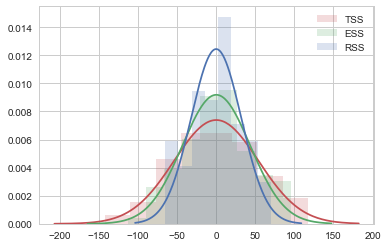

In [5]:
%matplotlib inline 
sns.distplot(y, 
             kde=False, fit=sp.stats.norm, hist_kws={"color": "r", "alpha": 0.2},
             fit_kws={"color": "r"}, label="TSS")
sns.distplot(result.fittedvalues, 
             kde=False, hist_kws={"color": "g", "alpha": 0.2}, fit=sp.stats.norm,
             fit_kws={"color": "g"}, label="ESS")
sns.distplot(result.resid, 
             kde=False, hist_kws={"color": "b", "alpha": 0.2}, fit=sp.stats.norm,
             fit_kws={"color": "b"}, label="RSS")
plt.legend()
plt.show()

## 결정계수(Coefficient of Determination)

위의 분산 관계식에서 모형의 성능을 나타내는 결정계수(Coefficient of Determination) $R^2$를 정의할 수 있다.

$$R^2 \equiv 1 - \dfrac{\text{RSS}}{\text{TSS}}\ = \dfrac{\text{ESS}}{\text{TSS}}\ $$

분산 관계식과 모든 분산값이 0보다 크다는 점을 이용하면 $R^2$의 값은 다음과 같은 조건을 만족함을 알 수 있다.

$$0 \leq R^2  \leq 1$$

여기에서 $R^2$가 0이라는 것은 오차의 분산 RSS가 최대이고 회귀분석 예측값의 분산 ESS가 0인 경우이므로 회귀분석 결과가 아무런 의미가 없다는 뜻이다.
반대로 $R^2$가 1이라는 것은 오차의 분산 RSS가 0이고 회귀분석 예측의 분산 ESS가 TSS와 같은 경우이므로 회귀분석 결과가 완벽하다는 뜻이다.
따라서 결정계수값은 회귀분석의 성능을 나타내는 수치라고 할 수 있다.

## 분산 분석표

앞에서 구한 결정계수는 값만 제시되어 있어서 믿을 수 있는 값인지 검정할 수 없다는 문제가 있다. 이를 해결하기 위해 분산분석을 이용한다. 분산 분석의 결과는 보통 다음과 같은 분산 분석표를 사용하여 표시한다. 아래의 표에서 $N$은 데이터의 갯수, $K$는 모수의 갯수를 뜻한다.


| source | degree of freedom | sum of square |  mean square(MS)  | F test-statstics | p-value |
|-|-|-|-|-|-|
| Regression| $$K-1$$ | $$\text{ESS}$$ | $$s_{\hat{y}}^2 = \dfrac{\text{ESS}}{K-1}$$   | $$F=\dfrac{s_{\hat{y}}^2}{s_e^2} $$ | p-value |
| Residual | $$N-K$$  | $$\text{RSS}$$  | $$s_e^2= \dfrac{\text{RSS}}{N-K}$$ | |
| Total     | $$N-1$$  | $$\text{TSS}$$ | $$s_y^2= \dfrac{\text{TSS}}{N-1}$$ | |
| $R^2$   |    |  $$\text{ESS} / \text{TSS}$$ |  | |

- 모수가 많아질수록 우연이라도 y와 관계가 있는 부분이 인정되어 residual이 작아져보이기 때문에 자유도에서 모수를 빼서 조정해준다($N-K$)

- F 통계량 식 $F=\dfrac{s_{\hat{y}}^2}{s_e^2} $의 분모에서 잔차는 normal(정규)분포를 따른다. 분자의 $\hat{y}$도 $\hat{y} = w_0 + w_1x_1 + w_2x_2 + ...w_Mx_M$에서 도출되었고, 여기서 가중치 $w$는 정규분포를 따르기 때문에 $\hat{y}$은 정규분포의 선형조합으로 역시 정규분포를 따른다. 정규분포를 제곱한 카이제곱분포를 다시 자유도로 나눈 두 확률분포의 비율은 F분포를 따르므로 F분포를 통해 해당 값의 유의확률을 구할 수 있다.

## 회귀 분석 F-검정과 분산 분석의 관계

이러한 모양의 표를 사용하는 이유는 분산 분석의 결과를 이용하여 회귀 분석 F-검정에 필요한 검정통계량을 구할 수 있기 때문이다. 

회귀 분석 F-검정의 원래 귀무 가설은 모든 계수 $w_i$가 $0$ 이라는 것이지만 이 때는 모형이 아무런 의미가 없으므로 결정계수 값도 0이 된다 

$$ H_0: R^2 = 0 \quad  (w_0 = w_1 = w_2 = .... = w_M = 0 \ ) $$

이 때 $\hat{w}$값은 기대값이 0인 정규 분포에서 나온 표본이므로 예측값 $\hat{y} = \hat{w}^T x$는 정규 분포의 선형 조합이라서 마찬가지로 정규 분포를 따른다. 그리고 잔차(residual)는 오차(disturbance)의 선형 변환으로 정규 분포를 따르므로 ESS와 RSS의 비율은 F 분포를 따른다.

$$ \dfrac{\text{ESS}}{K-1} \div  \dfrac{\text{RSS}}{N-K} \sim F(K-1, N-K) $$

따라서 이 값을 회귀 분석 F-검정의 검정통계량으로 사용할 수 있다.

- statsmodels 에서는 다음과 같이 `anova_lm` 명령을 사용하여 분산 분석표를 출력할 수 있다. 다만 이 명령을 사용하기 위해서는 모형을 `from_formula` 메서드로 생성하여야 한다.

- `anova_lm` 명령으로 구한 F 검정통계량과 유의확률은 모형 `summary` 명령으로 구한 `F-statistic` 및 `Prob (F-statistic)`과 일치한다.

In [5]:
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,188589.613492,188589.613492,179.863766,6.601482e-24
Residual,98.0,102754.337551,1048.513648,NaN,NaN


In [6]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Sat, 30 Jun 2018   Prob (F-statistic):           6.60e-24
Time:                        11:06:32   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

- 위 결과에서 상수항까지 모수로 포함돼 $K = 2$이다. $R^2$로도 모델의 설명력을 판단하기도 하지만 Prob(F) 값도 같이 고려해야 한다. Prob(F)는 원래는 귀무가설인 $R^2 = 0$이어야 하지만, 어쩌다 0.64가 나올 확률을 말하기도 한다. 

## 결정 계수와 상관 계수

$y$와 $\hat{y}$의 샘플 상관계수 $r$의 제곱은 결정 계수 $R^2$와 같다.

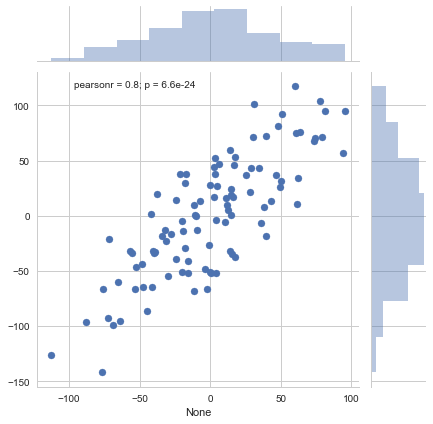

In [6]:
sns.jointplot(result.fittedvalues, y)
plt.show()

- $y$와 $\hat{y}$의 scatter plot이 선형이면 $\hat{y}$가 잘 예측된 것이라고 직관적인 판단만 내릴 수 있다. 
그래서 `sns.jointplot`에서는 $\hat{y}$를 유일한 독립변수라고 생각하고 상관계수와 F검정의 p-value를 리턴한다. $r$ 값이 0.2, 0.3과 같이 0에 가깝게 나오면 현실 데이터는 0인데 어쩌다 나온 값이 아닌지 의심되므로 p-value를 통해 정량적으로 판단해야 한다.

## 상수항이 없는 모형의 경우

모형에서 상수항이 없으면, 아래와 같이 확률론적 가정에 위배되는 상황이 발생한다.

$$ \bar{e} \neq 0,\\
\bar{\hat{y}} \neq \bar{y},\\
TSS \neq RSS + ESS$$

모형에서 상수항을 지정하지 않는 경우를 고려해 대부분의 패키지에서는 다른방식으로 $R^2$를 구한다. 즉, 결정계수의 정의에 사용되는 TSS의 정의가 다음과 같이 달라진다.

$$\text{TSS} = \sum_i y_i^2 = y^Ty $$

즉, 실제 샘플평균과 상관없이 $\bar{y} = 0$ 이라는 가정하에 TSS를 계산한다. 패키지에서는 상수항을 0으로 지정했으므로 표본이 0에 가깝게 분포되어 있어야 하는데 이례적으로 잘못추출된 데이터라고 판단해 처리하는 것이다. 이렇게 정의하지 않으면 TSS = RSS + ESS 관계식이 성립하지 않아서 결정계수의 값이 1보다 커지거나 음수가 된다.

따라서 모형의 결정계수를 비교할 때 **상수항이 없는 모형과 상수항이 있는 모형은 직접 비교하면 안된다.**

In [8]:
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=30, bias=100,
                              coef=True, random_state=0)
dfX = pd.DataFrame(X0, columns=["X"])
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model2 = sm.OLS.from_formula("Y ~ X + 0", data=df)
result2 = model2.fit()

In [9]:
result2.rsquared

0.18768724705943929

## F 검정을 이용한 모형 비교

F 검정을 이용하면 다음과 같이 포함관계(nesting)에 있는 두 모형의 성능을 비교할 수 있다. 

* 전체 모형(Full Model): $$ y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 $$
* 축소 모형(Reduced Model): $$ y = w_0 + w_1 x_1 $$


다음과 같은 귀무 가설을 검정하는 것은 위의 두 모형이 실질적으로 같은 모형이라는 가설을 검정하는 것과 같다.

$$ H_0: w_2 = w_3 = 0 $$

이 검정도 F 검정을 사용하여 할 수 있다. StatsModels에서는 `anova_lm` 명령에 두 모형의 result 객체를 인수로 넣어주면 이러한 검정을 할 수 있다. 인수를 넣어줄 때는 축소 모형(reduced model), 전체 모형(full model)의 순서로 넣어주고, 전체모형이 축소모형을 반드시 포함해야 한다.

In [7]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
dfX_boston = sm.add_constant(dfX0_boston)
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

In [9]:
model_full = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS +\
                            RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula("MEDV ~ CRIM + ZN + NOX + RM + DIS + RAD + TAX +\
                            PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,494.0,11082.941389,0.0,NaN,NaN,NaN
1,492.0,11080.276284,2.0,2.665105,0.05917,0.942554


- F-검정 결과 p-value가 0.943으로 크게 나타났으므로 귀무가설을 기각할 수 없다. 즉, 두 변수를 빼도 같은 모형이라는 것을 알 수 있다.

## F 검정을 사용한 변수 중요도 비교

**F 검정은 각 독립변수의 중요도를 비교**하기 위해 사용할 수 있다. 
방법은 전체 모형과 각 변수 하나만을 뺀 모형들의 성능을 비교하는 것이다. 이는 간접적으로 각 독립 변수의 영향력을 측정하는 것과 같다. 예를 들어 보스턴 집값 데이터에서 CRIM이란 변수를 뺀 모델과 전체 모델의 비교하는 검정을 하면 이 검정 결과는 CRIM변수의 중요도를 나타낸다.

In [12]:
model_full = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD +\
                                  TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula("MEDV ~ ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX +\
                                    PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11322.004277,0.0,NaN,NaN,NaN
1,492.0,11080.276284,1.0,241.727993,10.733502,0.001126


- CRIM변수에 대해 F 검정으로 구한 p-value와 회귀분석에서 단일 t-test로 구한 p-value는 같다. 단, 검정통계량은 다르다. 

In [13]:
model_full.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          6.95e-135
Time:                        14:32:42   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- `anova_lm` 명령에서는 `typ` 인수를 `2`로 지정하면 하나 하나의 변수를 뺀 축소 모형에서의 F 검정값을 한꺼번에 계산할 수 있다(회귀분석의 단일 t-test에서 구한 p-value와 같은 값이며, 더 자세히 볼 수 있다. 또는 result 객체 속성에서도 볼 수 있다.). 

- F 검정은 모델비교도 가능하기 때문에 여기서 **p-value가 작을수록** (해당 변수가 있는 모델에서) 귀무가설이 강하게 기각되므로 더 좋은 모델, 즉 **중요도가 높은 변수**이다. 

In [13]:
model_boston = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
result_boston = model_boston.fit()
sm.stats.anova_lm(result_boston, typ=2)

,sum_sq,df,F,PR(>F)
CRIM,241.727993,1.0,10.733502,1.126402e-03
ZN,257.226157,1.0,11.421671,7.836070e-04
INDUS,2.591314,1.0,0.115063,7.345971e-01
NOX,488.605951,1.0,21.695680,4.117296e-06
RM,1865.902935,1.0,82.852108,2.207486e-18
AGE,0.072792,1.0,0.003232,9.546859e-01
DIS,1232.544417,1.0,54.728947,6.017651e-13
RAD,478.172457,1.0,21.232399,5.189664e-06
TAX,242.053549,1.0,10.747958,1.117826e-03
PTRATIO,1195.939414,1.0,53.103567,1.268218e-12


이 값은 단일 계수 t 검정의 유의확률과 동일하다. 그 이유는 다음과 같은 **t 분포와 F 분포의 동치 성질** 때문이다.

$$ t_n^2 = F_{(1, n)} $$

## 분산 분석을 이용한 카테고리 값의 영향 분석

앞에서 보았듯이 카테고리 변수는 클래스 갯수과 같은 갯수의 더미 변수로 변환된다. 따라서 **더미 변수에 대해 분산 분석을 하면 각 카테고리가 가지는 영향력을 계산**하는 것과 같다. 이러한 분석을 **단방향 분산 분석(One-Way ANOVA)**이라고 한다.

단방향 분산분석, 일원분산분석은 집단을 구분하는 독립변수가 1개인 경우 집단간 종속변수의 평균차이를 분석하는 방법이다. 집단간 제곱합(BSS)이 클수록 집단간 평균 차이가 큰 것을 알 수 있다. 그러면 BSS가 어느 정도 커야 집단의 평균들 간에 통계적으로 유의한 차이가 있다고 말할 수 있는가? BSS는 관측치 단위와 집단의 수($k$)에 따라 달라지기 때문에 상대적으로 비교 평가할 수 있는 기준으로 집단내 제곱합(WSS)을 이용한다(WSS의 크기가 작을 수록 집단간 평균의 차이가 명확해진다.) **두 분산의 비를 나타내는 통계량 F값으로 집단간 평균의 차이가 통계적으로 유의한지를 분석하여 검정**한다.  

카테고리 값만을 유일한 독립 변수로 가지는 모형의 경우 $\bar{y}$은 표본 평균이고, $\bar{y}_k$은 클래스 $k$의 종속 변수(표본) 값의 평균이다. $N_k$은 $k$ 클래스에 속한 표본의 개수이다. 다음은 $K$개의 복수의 카테고리 값을 가지는 경우이다.

카테고리값을 이용하는 분산 분석의 경우에는 ESS라는 용어 대신 BSS(Between-Group Variance), RSS라는 용어 대신 WSS(Within-Group Variance)라는 용어를 쓰기도 한다.

* BSS(ESS): 각 그룹 평균의 분산 (Between-Group Variance) 
  $$ BSS = \sum_{k=1}^K N_k (\bar{y}_k - \bar{y})^2 $$

* WSS(RSS): 각 그룹 내의 오차의 분산의 합 (Within-Group Variance)
  $$ WSS = \sum_{i}^N (y_{i} - \bar{y}_k )^2 $$

* TSS : 전체 오차의 분산
  $$ TSS = \sum_{i}^N (y_{i} - \bar{y})^2 $$

| source | degree of freedom | sum of square |   mean square(MS)   | F test-statstics | p-value |
|-|-|-|-|-|-|
| Between  | $$K-1$$ | $$\text{BSS}$$ | $$ s_{\hat{y}}^2 = \dfrac{\text{BSS}}{K-1} $$   | $$F=\dfrac{s_{\hat{y}}^2}{s_e^2} $$ | p-value |
| Within   | $$N-K$$  | $$\text{WSS}$$  | $$ s_e^2=\dfrac{\text{WSS}}{N-K} $$ |
| Total     | $$N-1$$  | $$\text{TSS}$$ | $$ s_y^2 = \dfrac{\text{TSS}}{N-1} $$ |
| $R^2$   |    |  $$\text{BSS} / \text{TSS}$$ |  | |

이 때 F-검정의 귀무가설은 모든 더미 변수에 대한 계수가 0인 경우, 즉 클래스 구별에 따른 그룹간 분산 변화가 없는 경우이다.
즉 $\text{BSS}=0$(그룹간 평균의 차이가 없다)이고 $\text{WSS}=\text{TSS}$ 이다.

보스턴 집값 자료에서 변수 `CHAS`의 영향을 분산 분석으로 알아보면 다음과 같다.

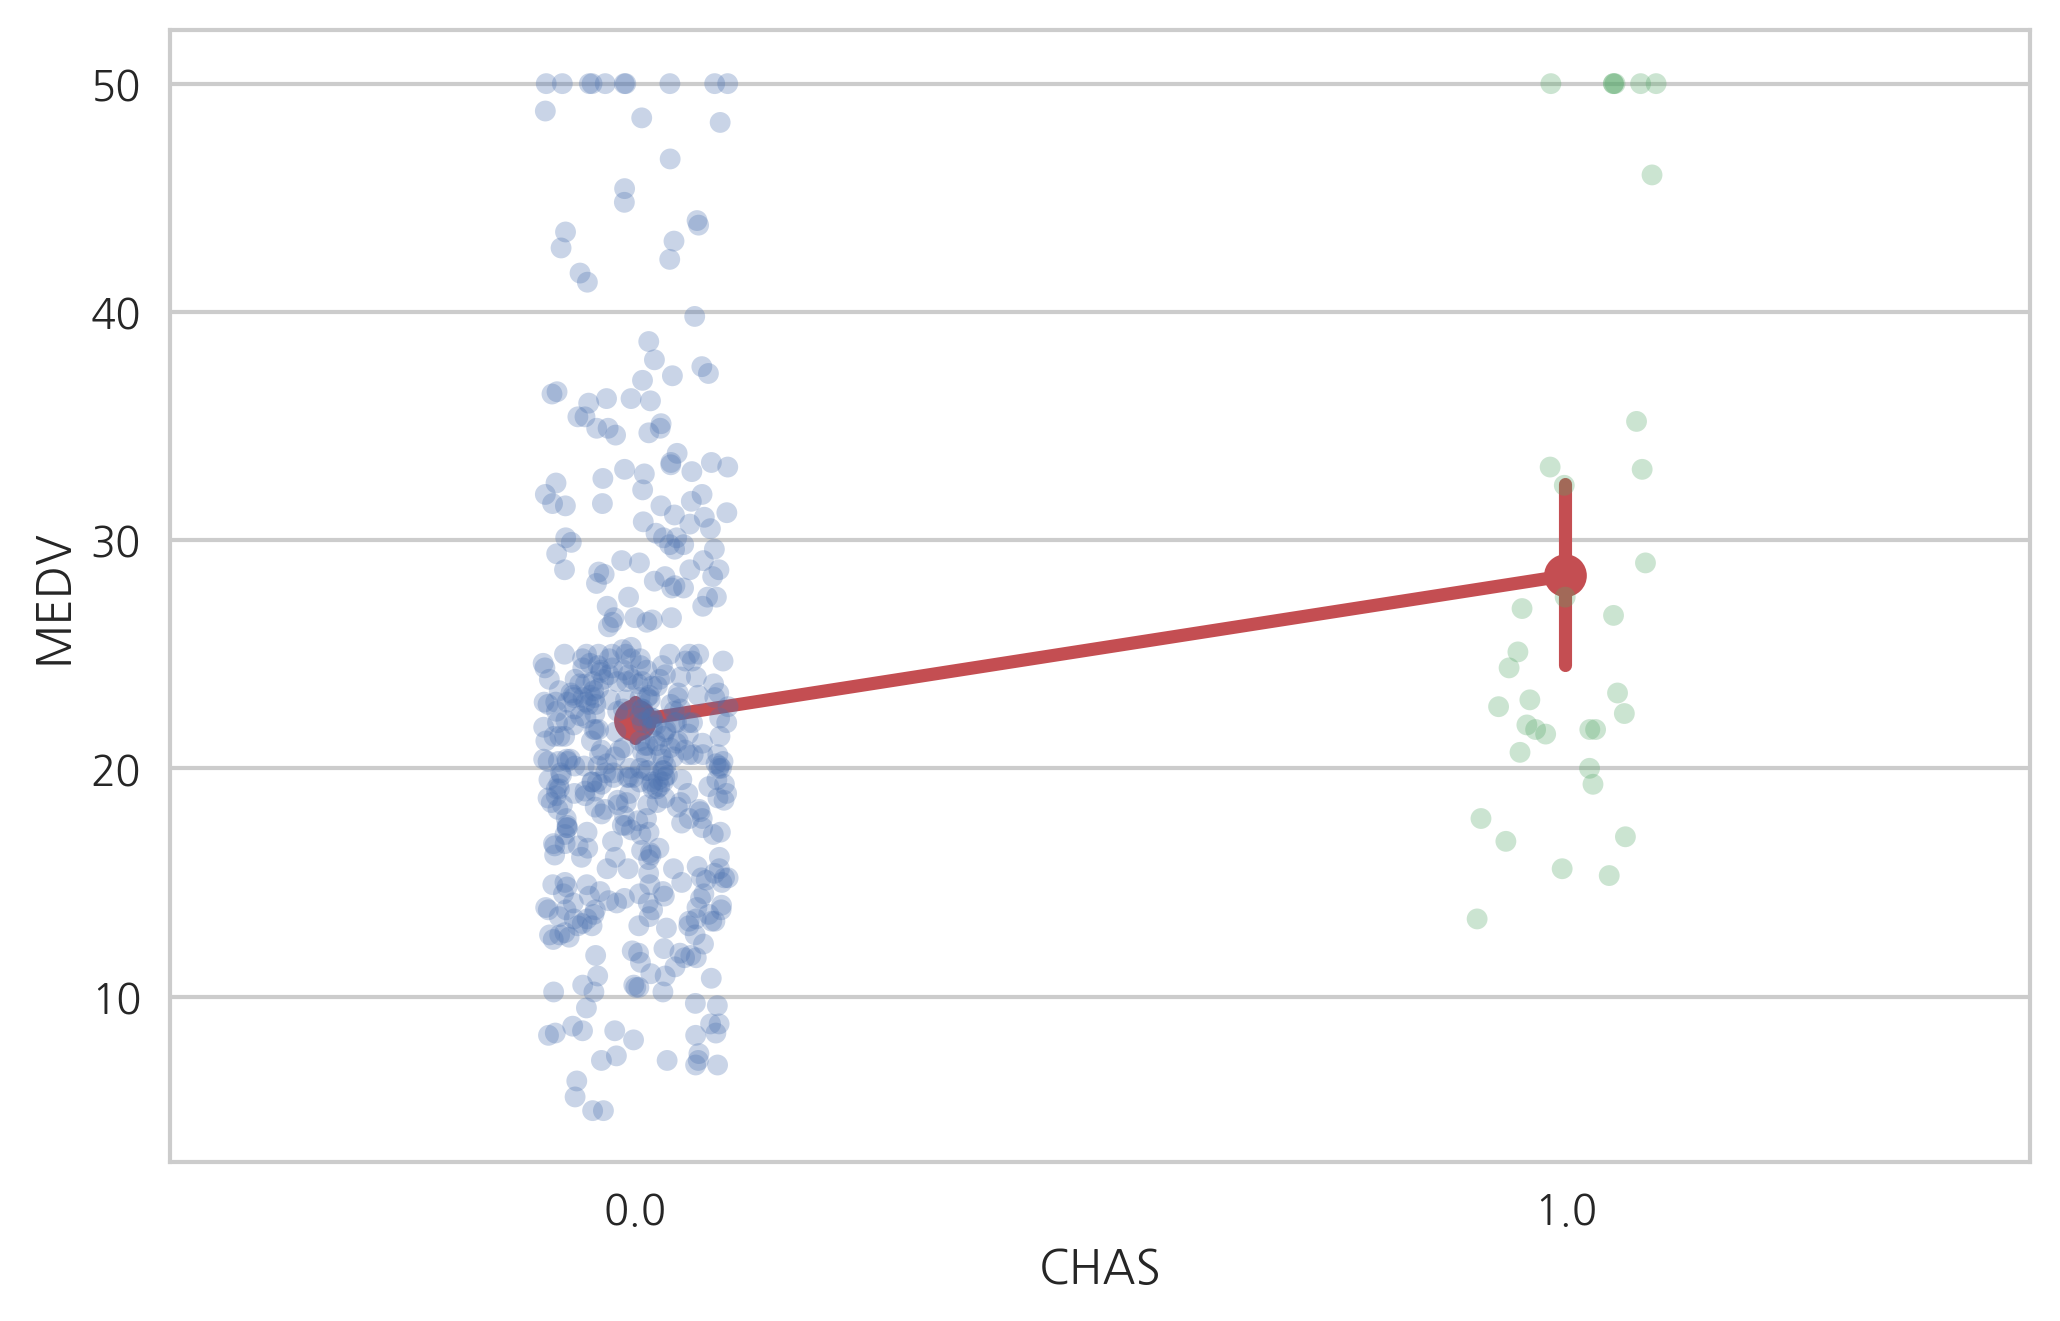

In [14]:
sns.stripplot(x="CHAS", y="MEDV", data=df_boston, jitter=True, alpha=.3)
sns.pointplot(x="CHAS", y="MEDV", data=df_boston, dodge=True, color='r')
plt.show()

In [15]:
model_chas = sm.OLS.from_formula("MEDV ~ C(CHAS) + 0", data=df_boston)
sm.stats.anova_lm(model_chas.fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(CHAS),2.0,258222.123856,129111.061928,1571.626788,2.495018e-217
Residual,504.0,41404.216144,82.151223,NaN,NaN


- p-value가 작을수록 class별로 변화가 없다는 귀무가설이 기각되어 class별로 평균 차이가 있으므로 카테고리로 구분하는게 의미가 있다는 뜻이다.

## 조정 결정 계수

선형 회귀 모형에서 독립 변수가 추가되면 결정 계수의 값은 항상 증가한다. 임의의 데이터라도 y와의 연관성이 조금이라도 나타나면 의미있는 데이터라고 판단해 결정계수가 증가하기 때문이다.  이는 다음과 같이 확인할 수 있다.

종속 변수 $y$를 회귀 분석하기 위한 기존의 독립 변수가 $X$이고 여기에 추가적인 독립 변수 $z$가 더해졌을 때, 다음과 같은 관계가 성립한다. 하지만 원래 모델이 종속변수를 잘 설명하는 경우에 새로운 변수가 추가되는 경우나 추가된 변수가 설명력이 없는 경우에는 결정계수가 조금 증가한다.

$$
R^2_{Xz} = R^2_{X} + (1-R^2_{X})r^{\ast 2}_{yz}
$$

여기에서 
* $R^2_{X}$: 기존의 독립 변수 $X$를 사용한 경우의 결정 계수
* $R^2_{Xz}$: 기존의 독립 변수 $X$와 추가적인 독립 변수 $z$를 모두 사용한 경우의 결정 계수
* $r^{\ast 2}_{yz}$: 추가적인 독립 변수 $z$와 종속 변수 $y$간의 상관 관계 계수


이고 이 항목들은 모두 양수이므로 

$$
R^2_{Xz} \geq R^2_{X}
$$

이러한 독립 변수 추가 효과를 상쇄시키기 위한 다양한 기준들이 제시되었다. 그 중 하나가 다음과 같이 독립 변수의 갯수 $K$에 따라 결정 계수의 값을 조정하는 조정 결정 계수이다. $R_{adj}^2$는 어느 값까지는 $K$가 늘어날 때 같이 증가하다가 어느 값 이상이되면 감소한다. $R_{adj}^2$이 가장 높다고 해서 가장 좋은 모델이라는 보장은 없다.

$$
R_{adj}^2 = 1 - \frac{n-1}{n-K}(1-R^2) = \dfrac{(n-1)R^2 +1-K}{n-K}
$$



## 정보량 규준

조정 결정 계수와 함께 많이 쓰이는 모형 비교 기준은 최대 우도에 독립 변수의 갯수에 대한 손실(penalty)분을 반영하는 방법이다. 
이를 **정보량 규준(information criterion)**이라고 하며 손실 가중치의 계산 법에 따라 AIC (Akaike Information Criterion)와 BIC (Bayesian Information Criterion) 두 가지를 사용한다.

AIC는 모형과 데이터의 확률 분포 사이의 Kullback-Leibler 수준을 가장 크게하기 위한 시도에서 나왔다. BIC는 데이터가 exponential family라는 가정하에 주어진 데이터에서 모형의 likelihood를 측정하기 위한 값에서 유도되었다. 둘 다 값이 작을 수록 올바른 모형에 가깝다.

$$
\text{AIC} = -2\log L + 2K
$$

$$
\text{BIC} = -2\log L + K\log n
$$